In [3]:
#preload some datasets

import sklearn.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
import math

# Want a variety of datasets such that:
## Num of features are varied but datapoints are similar (to measure speed vs feature size)
## Num of datapoints are varied but features are similar (to measure speed vs dataset size)

## DATASET 1: IRIS FROM SKLEARN
# imported as dictionary {'data':, 'target':, 'target_names':}
iris_dataset = datasets.load_iris()
iris_data = np.array(iris_dataset['data'])
iris_target = np.array(iris_dataset['target'])

## DATASET 2: WINE FROM SKLEARN
wine_dataset = datasets.load_wine()
wine_data = np.array(wine_dataset['data'])
wine_target = np.array(wine_dataset['target'])

## DATASET 3: BREAST CANCER FROM SKLEARN
bcancer_dataset = datasets.load_breast_cancer()
bcancer_data = np.array(bcancer_dataset['data'])
bcancer_target = np.array(bcancer_dataset['target'])


print("iris shape", iris_data.shape)
print("wine shape", wine_data.shape)
print("bcancer shape", bcancer_data.shape)


iris shape (150, 4)
wine shape (178, 13)
bcancer shape (569, 30)


In [4]:
#Likely also some ways to generate fake datasets

from sklearn.datasets import make_blobs

def generate_fake_dataset(samples, features, centers, std):
    blobs, classes = make_blobs(n_samples=samples, n_features=features, centers=centers, cluster_std=std, random_state=100)
    return blobs, classes

def plot_dataset_2D(samples, classes):
    plt.scatter(samples[:,0], samples[:,1], c=classes)
    #plt.xlim(0,1)
    #plt.ylim(0,1)
    plt.show()
    return

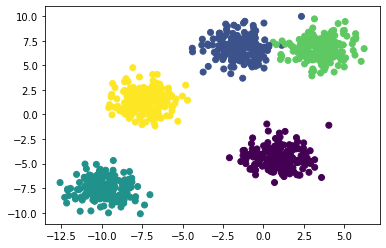

In [88]:
testx, testy = generate_fake_dataset(1000, 2, 5, 1)
plot_dataset_2D(testx, testy)

In [89]:
import time
from copy import deepcopy

print(time.time())

1588198070.7624354


In [90]:
def distance(point1, point2):
    return np.sqrt(np.sum((point1-point2)*(point1-point2)))

def nearest_neighbor_classical(points, centroid_list):
    class_array = np.zeros(points.shape[0])
    # assign each point to a class
    for i in range(points.shape[0]):
        min_index = np.argmin([distance(points[i], centroid) for centroid in centroid_list])
        class_array[i] = min_index 
    return class_array

def centroid_update(points, class_array, centroid_list):
    temp_centroid_list = deepcopy(centroid_list)
    for i in range(centroid_list.shape[0]):
        # probably need to fix this
        #print(points.shape)
        #print(temp_centroid_list[i])
        class_sum = np.zeros(points.shape[1])
        class_num = 0
        for j in range(points.shape[0]):
            if class_array[j] == i:
                class_sum += points[j]
                class_num += 1
        temp_centroid_list[i] = np.divide(class_sum, class_num)
        #print("centroid", temp_centroid_list[i])
        #print(class_num)
    return temp_centroid_list

def kmeans_classical(samples, class_num):
    # choose 6 random samples to be the centroids
    indices = np.random.randint(samples.shape[0], size=class_num)
    centroid_list = np.array([samples[i] for i in indices])
    #print(centroid_list)
    
    #old_class = np.zeros(samples.shape[0])
    stop_flag = False
    old_centroid_list = centroid_list
    start_time = time.time()
    counter = 0
    #print('old', old_centroid_list)
    
    # assign classes based on current centroids
    while not stop_flag:
        counter +=1
        #print(counter)
        new_class = nearest_neighbor_classical(samples, old_centroid_list)
        new_centroid_list = centroid_update(samples, new_class, old_centroid_list)
        #print(np.array(old_centroid_list))
        #print(np.array(new_centroid_list))
        #print(new_class)
        if np.sum(np.array(new_centroid_list-old_centroid_list)) == 0:
            stop_flag = True
            stop_time = time.time()
        else:
            #print("else reached")
            old_centroid_list = new_centroid_list
            #old_class = new_class
    print("time taken: ", stop_time - start_time, " seconds")
    return samples, new_class, new_centroid_list
    

In [99]:
a, b, c = kmeans_classical(testx, 5)

time taken:  0.3036324977874756  seconds


In [102]:
# measure accuary (AUC?)
import sklearn.metrics as metrics

def accuracy(class_list, ground_truth):
    diff = class_list - ground_truth
    #print(diff)
    zero_counter = 0
    
    for entry in diff:
        if entry == 0:
            zero_counter += 1
    
    return zero_counter/class_list.shape[0]

#multiclass not supported
#def AUC(class_list, ground_truth):
#    return metrics.roc_auc_score(ground_truth, class_list)

In [104]:
print(accuracy(b,testy))
#print(AUC(b, testy))

0.281


In [107]:
# quantum k means
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.tools.visualization import plot_histogram
from qutip import *
from IPython.display import Image

backend = Aer.get_backend('qasm_simulator')

In [28]:
# Implementing K-Means
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV
import time
import sklearn.metrics as metrics

def K_Means(features, target, search_grid):
    kmeans = KMeans()
    kmeans_random = RandomizedSearchCV(estimator = kmeans, param_distributions = search_grid)
    time_start = time.time()
    
    search = kmeans_random.fit(features, target)
    k_final = search.best_estimator_
    print('time taken: ', time.time() - time_start)
    print(k_final)
    print(search.best_score_)
    return 

In [29]:
n_clusters = [2,3,4,5,6,7,8,9,10] 
n_init = [2,5,10,20]
max_iter = [300,600,1000]
tol = [1e-4]
precompute_distances = ['auto', True, False]
njobs = [-1]
algorithm = ['auto', 'full', 'elkan']

random_grid = {
    'n_clusters': n_clusters,
    'n_init' : n_init,
    'max_iter' : max_iter,
    'tol' : tol,
    'precompute_distances' : precompute_distances,
    'n_jobs' : njobs,
    'algorithm' : algorithm
               }

In [30]:
K_Means(iris_data, iris_target, random_grid)

C:\Users\miles\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


time taken:  0.4293074607849121
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=10, n_init=5, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
-136.9407598765433


In [31]:
K_Means(wine_data, wine_target, random_grid)

C:\Users\miles\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


time taken:  0.3847661018371582
KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=10, n_init=2, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
-1430808.932699262


C:\Users\miles\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:
K_Means(bcancer_data, bcancer_target, random_grid)

C:\Users\miles\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


time taken:  0.630089521408081
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=10, n_init=2, n_jobs=-1, precompute_distances=True,
       random_state=None, tol=0.0001, verbose=0)
-4243492.788923874


C:\Users\miles\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
